In [3]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from allison.regression import LinearRegression
from allison.utils.functions.loss import mean_squared_error
from allison.utils.metrics import r2_score
from allison.datasets import train_test_split

In [5]:
n = 1000
x=np.linspace(2,20,n)
y=2*x + 1 + 2*np.sin(x) + np.random.randn(n)

data = pd.DataFrame({'x':x, 'y':y})
data.head()

,x,y
0,2.000000,8.045451
1,2.018018,6.585684
2,2.036036,6.591512
3,2.054054,4.532054
4,2.072072,9.069173


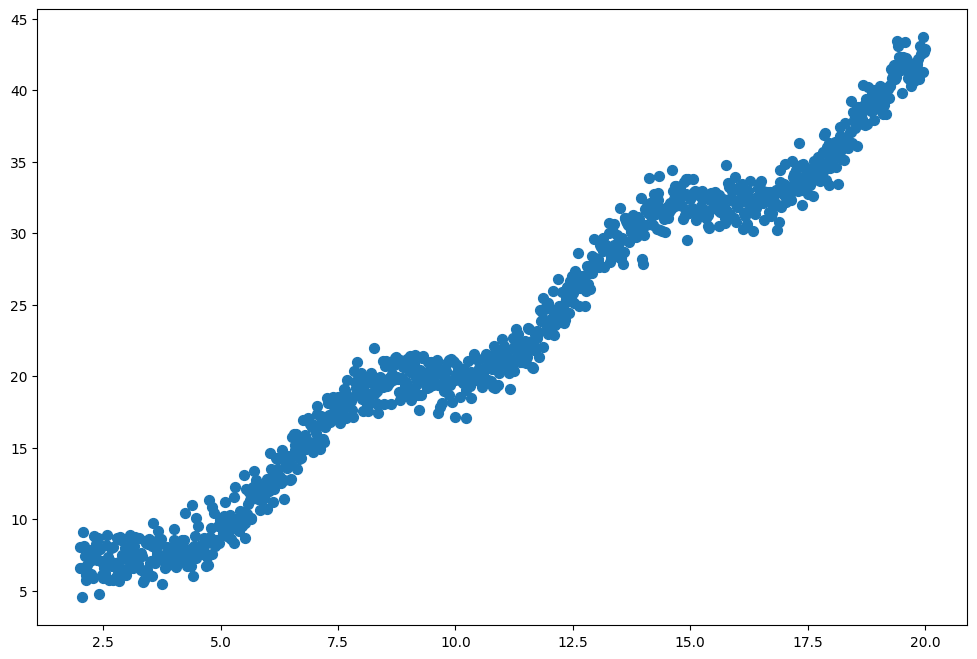

In [6]:
plt.figure(figsize=(12,8))
plt.scatter(data['x'],data['y'],s=50)

In [7]:
X = data['x']
y = data['y']

X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.2, random_state=42)

In [8]:
model=LinearRegression(loss_function=mean_squared_error,
                      metric=r2_score,
                      lr = 0.001)

model.train(X_train, y_train,n_iters=20, history_train=True)

Iter:	2	==================================================>	 mean_squared_error: 723.722% 	 r2_score: -143593.62% 

Iter:	4	==================================================>	 mean_squared_error: 234.357% 	 r2_score: -1208.87% 

Iter:	6	==================================================>	 mean_squared_error: 76.820% 	 r2_score: -54.90% 

Iter:	8	==================================================>	 mean_squared_error: 26.309% 	 r2_score: 64.77% 

Iter:	10	==================================================>	 mean_squared_error: 10.231% 	 r2_score: 88.78% 

Iter:	12	==================================================>	 mean_squared_error: 5.180% 	 r2_score: 94.89% 

Iter:	14	==================================================>	 mean_squared_error: 3.631% 	 r2_score: 96.62% 

Iter:	16	==================================================>	 mean_squared_error: 3.180% 	 r2_score: 97.13% 

Iter:	18	==================================================>	 mean_squared_error: 3.062% 	 r2_score: 97.29% 

In [9]:
history = model.history_train
history

{'iter': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
 'loss': [np.float64(723.7224523043417),
  np.float64(234.35714811091972),
  np.float64(76.81978238244412),
  np.float64(26.309059441230087),
  np.float64(10.230613569335034),
  np.float64(5.179540380652429),
  np.float64(3.6314710557589422),
  np.float64(3.179711947300068),
  np.float64(3.061512976650682),
  np.float64(3.039187903543992)],
 'precision': [np.float64(-1435.9362269387577),
  np.float64(-12.088717142282364),
  np.float64(-0.5489641815381567),
  np.float64(0.6476741632883658),
  np.float64(0.8878475599644937),
  np.float64(0.9489059700975139),
  np.float64(0.9661832891985483),
  np.float64(0.9713243600350902),
  np.float64(0.9728831441743299),
  np.float64(0.9733533713164069)],
 'params': [{'bias': array([0.]), 'weights': array([-0.85131227])},
  {'bias': array([0.11366953]), 'weights': array([0.40360956])},
  {'bias': array([0.17833239]), 'weights': array([1.11749336])},
  {'bias': array([0.21511697]), 'weights': array([1.523

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))


# Update function for the animation
def update(i):
    ax.clear()  # Clear the axis

    model.bias = history['params'][i]['bias']
    model.weights = history['params'][i]['weights']

    a = model.weights[0]
    b = model.bias[0]

    ax.scatter(X_train, y_train, s=50)
    if i > 0:
        ax.plot(X_train, model.predict(X_train), lw=3, c='red',label=f'Predicted y = {a:.2f}x + {b:.2f}, loss = {history["loss"][i-1]:.2f}, r2 = {history["precision"][i-1]:.2f}%')
    else:
        ax.plot(X_train, model.predict(X_train), lw=3, c='red', label=f'Predicted y = {a:.2f}x + {b:.2f}')
    ax.legend()



# Create the animation
ani = FuncAnimation(fig, update, frames=len(history['params']), repeat=False,interval=1000)

plt.close(fig)

# Display the animation
HTML(ani.to_jshtml())

In [11]:
r2_score =model.evaluate(X_test, y_test)
r2_score

np.float64(0.9733644950240452)

Text(0.5, 1.0, 'Linear Regression on Test Data(Accuracy:0.97%)')

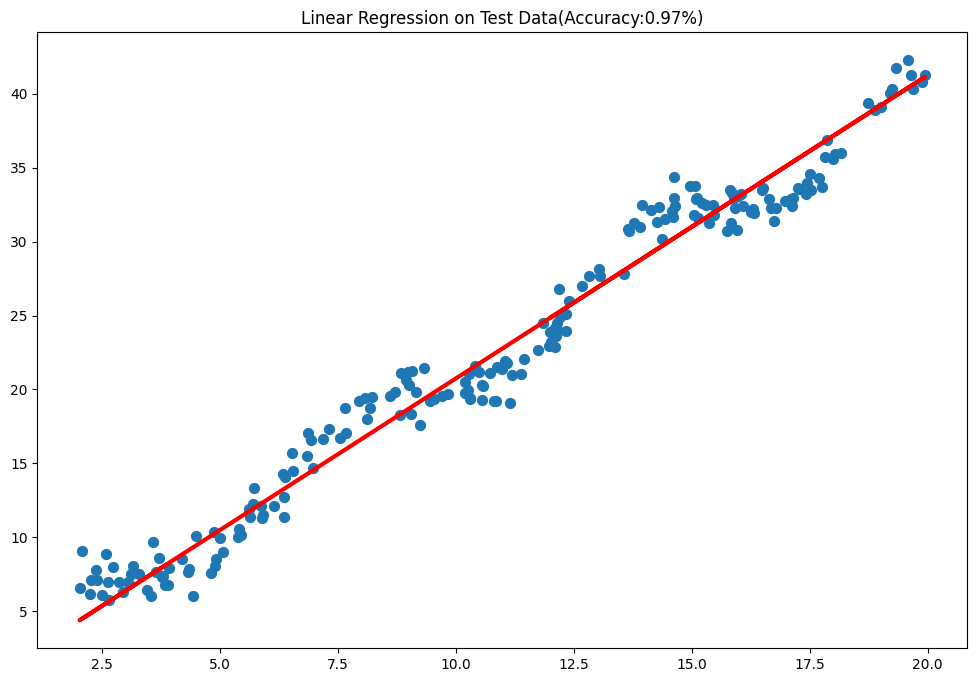

In [12]:
plt.figure(figsize=(12,8))
plt.scatter(X_test,y_test,s=50)
plt.plot(X_test,model.predict(X_test), lw=3, c='red')
plt.title(f'Linear Regression on Test Data(Accuracy:{r2_score:.2f}%)')